In [3]:
# Hyperbolic partial differential equation 푸는 방법
# upwind scheme

import matplotlib.pyplot as plt
import numpy as np

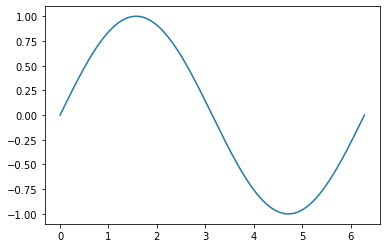

In [12]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

plt.plot(x, y)

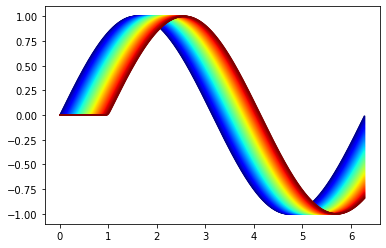

In [14]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

a = 1

ap = max(a, 0)
am = min(a, 0)

dx = x[1] - x[0]
cfl = 0.9
dt = cfl * dx / abs(a)

t_end = 1
nt = int(t_end / dt)
color = plt.cm.jet(np.linspace(0, 1, nt))

for i in range(nt):
  uxm = (y[1:-1] - y[0: -2]) / dx
  uxp = (y[2: ] - y[1: -1]) / dx
  y[1:-1] = y[1:-1] - dt * (ap * uxm + am * uxp)
  plt.plot(x[1:-1], y[1:-1], color = color[i])

'''
값이 작은게 파란 색
값이 큰 게 빨간 색 
값이 큰 쪽으로 이동한 것
우리가 입력한 a의 속도를 갖고 움직인 것 
-1로 바꾸면 웨이브가 거꾸로 간다. 
'''

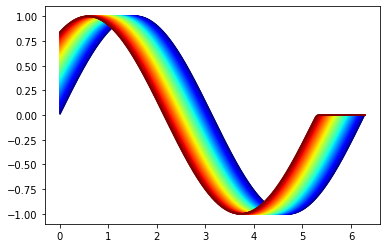

In [15]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

a = -1

ap = max(a, 0)
am = min(a, 0)

dx = x[1] - x[0]
cfl = 0.9
dt = cfl * dx / abs(a)

t_end = 1
nt = int(t_end / dt)
color = plt.cm.jet(np.linspace(0, 1, nt))

for i in range(nt):
  uxm = (y[1:-1] - y[0: -2]) / dx
  uxp = (y[2: ] - y[1: -1]) / dx
  y[1:-1] = y[1:-1] - dt * (ap * uxm + am * uxp)
  plt.plot(x[1:-1], y[1:-1], color = color[i])

  # 파란색에서 빨간색으로 간다고 하면, 웨이브가 거꾸로 가고 있다.
  # 끝이 마음에 안든다 -> boundary를 준다 (Periodic boundary)

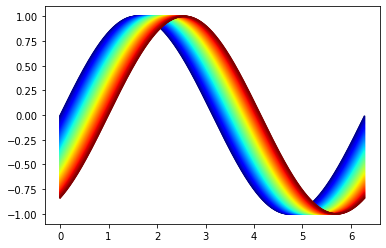

In [36]:
# 0에는 nx, nx+1에는 1을 넣어주면, 연결됨

def pb(y):
  y[0] = y[nx] ; y[nx+1] = y[1]
  return y

nx = 1000 # 천 개의 그리드

dx = 2 * np.pi / nx
x = np.arange(-dx, 2*np.pi + dx, dx) # 등차수열이라고 생각하면 된다.
y = np.sin(x)

a = 1

ap = max(a, 0)
am = min(a, 0)

dx = x[1] - x[0]
cfl = 0.9
dt = cfl * dx / abs(a)

t_end = 1
nt = int(t_end / dt)
color = plt.cm.jet(np.linspace(0, 1, nt))

for i in range(nt):
  uxm = (y[1:-1] - y[0: -2]) / dx
  uxp = (y[2: ] - y[1: -1]) / dx
  y[1:-1] = y[1:-1] - dt * (ap * uxm + am * uxp)
  y = pb(y) # 추가 - boundary condition 완성
  plt.plot(x[1:-1], y[1:-1], color = color[i])
  # plt.show()

In [ ]:
# hydrodynamic conservation equation
# 질량, 모멘텀, 에너지 보존 3개의 식을 푸는 것 -> 하나의 수식으로 쓸 수 있다. 

# dt : 시간에 따라 속도가 일정하다. (시간에 따라 속도가 변하는 것이 자연스러운 현상)
# 이렇게 linear하게 움직이지 않는다. 
# 따라서 시간 진화를 정밀하게 계산하고 싶을 때 -> runge kutta method
# 속도가 시간에 따라 2차 함수 형태로 진화한다면? 

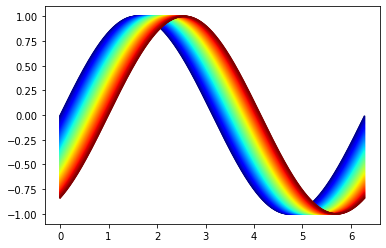

In [44]:
# Time integration: Runge kutta method

def dt_step(dt, y):
  dy = np.zeros(len(y))
  dy[1:-1] = -dt * (ap * uxm + am * uxp)
  return dy


# a가 시간에 따라 바뀐다는 조건을 줄 수 있다면? 
# 속도를 안에 집어넣은 코드가 어떻게 바뀔 지 생각해보자.

def rk4(dt, y):
  y_0 = y

  y_1 = y + dt_step(dt * 0.5, y_0)
  y_1 = pb(y_1)

  y_2 = y + dt_step(dt * 0.5, y_1)
  y_2 = pb(y_2)

  y_3 = y + dt_step(dt, y_2)
  y_3 = pb(y_3)

  y_4 = (-y_0 + y_1 + 2 * y_2 + y_3)/3 + dt_step(dt/6, y_3)
  y_4 = pb(y_4)
  return y_4



nx = 1000 # 천 개의 그리드

dx = 2 * np.pi / nx
x = np.arange(-dx, 2*np.pi + dx, dx) # 등차수열이라고 생각하면 된다.
y = np.sin(x)

a = 1

ap = max(a, 0)
am = min(a, 0)

dx = x[1] - x[0]
cfl = 0.9
dt = cfl * dx / abs(a)

t_end = 1
nt = int(t_end / dt)
color = plt.cm.jet(np.linspace(0, 1, nt))

for i in range(nt):
  uxm = (y[1:-1] - y[0: -2]) / dx
  uxp = (y[2: ] - y[1: -1]) / dx
  y = rk4(dt, y)
  y = pb(y) # 추가 - boundary condition 완성
  plt.plot(x[1:-1], y[1:-1], color = color[i])


In [ ]:
# 사실 그래프는 같다.
# 시간에 따라 변화하지 않은 상태 -> 둘 다 같다
# 시간에 따라 변하는 속도라면 rk4를 쓰는 것이 좋다.